# ДЗ №7 по теме перестройки в геноме

In [3]:
from random import randrange
import matplotlib.pyplot as plt

В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

### Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).  
Симуляция заключается в следующем:  
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

In [4]:
def reverse_block(seq: list, l: int, r: int):
    seq[l : r] = [-seq[i] for i in range(r-1, l-1, -1)]
    return seq

def generate_sequence(n: int, k: int):
    sequence = [i + 1 for i in range(n)]
    for _ in range(k):
        l = randrange(1, n)
        r = randrange(l, n + 1)
        sequence = reverse_block(sequence, l - 1, r)
    return sequence

### Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [5]:
def greedy(seq: list):
    n = len(seq)
    count = 0
    for i in range(n):
        ind = i + 1
        if seq[i] == ind:
            continue
        j = ind
        while seq[j - 1] not in [ind, -ind]:
            j += 1
        seq = reverse_block(seq, ind - 1, j)
        count += 1
        if seq[i] == -ind:
            seq[i] = -seq[i]
            count += 1
    return count

### Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния.  Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.  
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).  
Постарайтесь объяснить, что происходит.

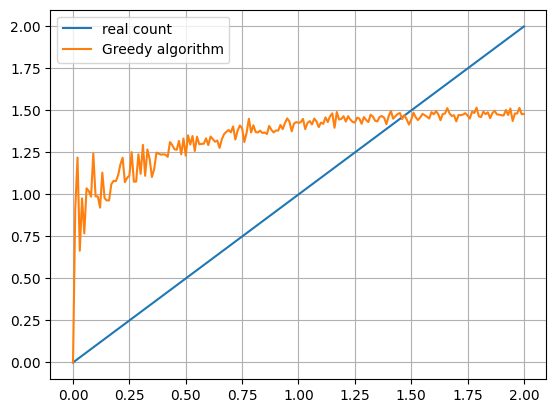

In [10]:
n = 1000
all_k = [i / n for i in range(0, 2*n + 1, 10)]
all_count = [0 for _ in range(len(all_k))]
for i in range(len(all_k)):
    sequence = generate_sequence(n, int(all_k[i] * n))
    all_count[i] = greedy(sequence) / n

plt.plot(all_k, all_k, label='real count')
plt.plot(all_k, all_count, label='Greedy algorithm')
plt.legend()
plt.grid()

По графику видно, что количество разворотов стремится к 1500 ($\rightarrow 1.5n$). Обоснуем это математически.

$ $

Посчитаем математическое ожидание числа количества правильно поставленных блоков. Для этого просуммируем вероятности того, что $|seq_i| = i$ (блок стоит в правильном месте). Вероятность того, что первый элемент стоит на своём месте равна $\frac{1}{n}$. Так как последующие элементы мы рассматриваем только после того, как поставили в правильном порядке все предыдущие, то вероятность того, что $seq_i$ стоит на своём месте, увеличивается и равна $\frac{1}{n - i + 1}$ для $i = 1, ..., n$. Тогда матожидание числа правильно поставленных блоков равно:

$\mathbb{E}(\#(|seq_i| = i)) = \frac{1}{1000} + \frac{1}{999} + ... + \frac{1}{2} + \frac{1}{1}$.

Чтобы найти эту сумму (так как ряд гармонический, расходящийся), возьмём интеграл:

$\mathbb{E}(\#(|seq_i| = i)) = \int_1^{1000} \frac{1}{n} dn = 3\ln{10} \approx 7$

Значит для нашей последовательности число неправильно стоящих блоков (а следовательно и их переворачиваний) стремится к $\mathbb{E}(\#(|seq_i| \neq i)) = 1000 - 7 = 993$. Для осознания того, куда стремится эта величина, посмотрим матожидание количества блоков для $n = 100$ и $n = 10000$:

$n = 100 : \mathbb{E}(\#(|seq_i| \neq i)) = 100 - 2\ln{10} = 100 - 5 = 95$

$n = 1000 : \mathbb{E}(\#(|seq_i| \neq i)) = 1000 - 7 = 993$

$n = 10000 : \mathbb{E}(\#(|seq_i| \neq i)) = 10000 - 4\ln{10} = 10000 - 9 = 9991$

Наблюдается явное стремление к $n$. Значит можно сказать, что матожидание количества перемещений блоков на правильную позацию равно числу последовательности.

$ $

Теперь рассматриваем последовательность, у которой все блоки стоят на нужной позиции, но возможна ситуация, что блоки неправильно ориентированы. Так как всего возможных ситуаций у нас две ($+$ или $-$), значит вероятность того, что отдельный блок неправильно ориентирован равна $\frac{1}{2}$. В контексте всей последовательности - необходимо просуммировать вероятности нахождения в неправильной ориентации каждого отдельного блока:

$\mathbb{E}(\#(seq_i \neq i)) = \frac{1}{2} \cdot n = \frac{n}{2}$.

Тогда окончательно получаем математическое ожидание числа разворотов для последовательности длинной $n$:

$\mathbb{E}(\texttt{количество разворотов}) = \mathbb{E}(\#(|seq_i| \neq i)) + \mathbb{E}(\#(seq_i \neq i)) = n + \frac{n}{2} = 1.5n$ - что мы и получили на практике.